In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sqlite3

In [4]:
# Define the path to the CSV file you created
file_path = os.path.join(os.pardir, 'data', 'raw_weather_data.csv')

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded
print("First 5 rows of data:")
print(df.head())

# See the column names and data types
print("\nData Info:")
df.info()


First 5 rows of data:
   timestamp_utc    city  temperature_c  feels_like_c  humidity_percent  \
0     1765730334  Riyadh          17.84         17.04                52   
1     1765731960  Riyadh          17.84         17.04                52   
2     1765731960  Riyadh          17.84         17.04                52   
3     1765731960  Riyadh          17.84         17.04                52   
4     1765735441  Riyadh          17.29         16.41                51   

   pressure_hpa  wind_speed_m_s weather_main weather_description  
0          1018            5.59        Clear           clear sky  
1          1018            5.59        Clear           clear sky  
2          1018            5.59        Clear           clear sky  
3          1018            5.59        Clear           clear sky  
4          1018            5.87       Clouds          few clouds  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Colu

In [5]:
# The timestamp is in seconds (Unix time), so we convert it to a datetime object
df['datetime_utc'] = pd.to_datetime(df['timestamp_utc'], unit='s')

# Set the new datetime column as the index for better time-series analysis
df.set_index('datetime_utc', inplace=True)

# Drop the old 'timestamp_utc' column
df.drop('timestamp_utc', axis=1, inplace=True)

print("Data after timestamp conversion:")
print(df.head())


Data after timestamp conversion:
                       city  temperature_c  feels_like_c  humidity_percent  \
datetime_utc                                                                 
2025-12-14 16:38:54  Riyadh          17.84         17.04                52   
2025-12-14 17:06:00  Riyadh          17.84         17.04                52   
2025-12-14 17:06:00  Riyadh          17.84         17.04                52   
2025-12-14 17:06:00  Riyadh          17.84         17.04                52   
2025-12-14 18:04:01  Riyadh          17.29         16.41                51   

                     pressure_hpa  wind_speed_m_s weather_main  \
datetime_utc                                                     
2025-12-14 16:38:54          1018            5.59        Clear   
2025-12-14 17:06:00          1018            5.59        Clear   
2025-12-14 17:06:00          1018            5.59        Clear   
2025-12-14 17:06:00          1018            5.59        Clear   
2025-12-14 18:04:01     

In [6]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       temperature_c  feels_like_c  humidity_percent  pressure_hpa  \
count     138.000000    138.000000        138.000000    138.000000   
mean       13.289275     11.753043         57.652174   1018.014493   
std         3.145005      4.083020         17.182427      3.357061   
min         7.650000      4.070000         29.000000   1010.000000   
25%        10.472500      9.070000         41.250000   1015.000000   
50%        13.690000     12.630000         60.000000   1018.500000   
75%        15.610000     14.857500         70.000000   1021.000000   
max        18.780000     18.280000         92.000000   1024.000000   

       wind_speed_m_s  
count      138.000000  
mean         4.811812  
std          2.281025  
min          1.200000  
25%          2.960000  
50%          5.065000  
75%          6.062500  
max         10.430000  


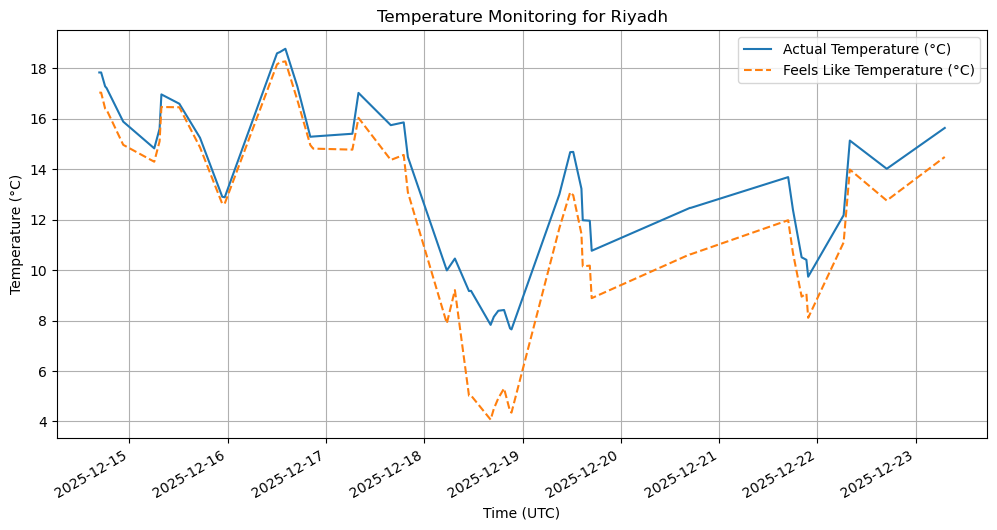

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(12, 6))

# Plot the main temperature and the 'feels like' temperature
df['temperature_c'].plot(label='Actual Temperature (°C)')
df['feels_like_c'].plot(label='Feels Like Temperature (°C)', linestyle='--')

plt.title(f'Temperature Monitoring for {df["city"].iloc[0]}')
plt.xlabel('Time (UTC)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# You can save this figure for your report later
plt.savefig(os.path.join(os.pardir, 'docs', 'temperature_plot.png'))
